In [40]:
import healpy as hp
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from hipscat.catalog import Catalog, PartitionInfo
from hipscat.io import file_io, paths

def _plot_healpix_map(healpix_map, projection, title, draw_map=True):
    """Perform the plotting of a healpix pixel map.

    Args:
        healpix_map: array containing the map
        projection: projection type to display
        title: title used in image plot
    """
    if projection == "moll":
        projection_method = hp.mollview
    elif projection == "gnom":
        projection_method = hp.gnomview
    elif projection == "cart":
        projection_method = hp.cartview
    elif projection == "orth":
        projection_method = hp.orthview
    else:
        raise NotImplementedError(f"unknown projection: {projection}")

    if draw_map:  # pragma: no cover
        projection_method(
            healpix_map,
            title="Hello, Huskies!",
            cbar=False,
            nest=True,
        )
        plt.plot()

def plot_pixels(pixels, catalog_name, projection="moll", draw_map=True):
    """Create a visual map of the pixel density of the catalog.
    Args:
        catalog (`hipscat.catalog.Catalog`) Catalog to display
        projection (str) The map projection to use. Valid values include:
            - moll - Molleweide projection (default)
            - gnom - Gnomonic projection
            - cart - Cartesian projection
            - orth - Orthographic projection
    """
    catalog_orders = pixels[PartitionInfo.METADATA_ORDER_COLUMN_NAME].unique()
    catalog_orders.sort()
    max_order = catalog_orders[-1]

    order_map = np.full(hp.order2npix(max_order), hp.pixelfunc.UNSEEN)

    for _, pixel in pixels.iterrows():
        explosion_factor = 4 ** (
            max_order - pixel[PartitionInfo.METADATA_ORDER_COLUMN_NAME]
        )
        exploded_pixels = [
            *range(
                pixel[PartitionInfo.METADATA_PIXEL_COLUMN_NAME] * explosion_factor,
                (pixel[PartitionInfo.METADATA_PIXEL_COLUMN_NAME] + 1)
                * explosion_factor,
            )
        ]
        order_map[exploded_pixels] = pixel[PartitionInfo.METADATA_ORDER_COLUMN_NAME]
    _plot_healpix_map(
        order_map,
        projection,
        f"Catalog pixel density map - {catalog_name}",
        draw_map=draw_map,
    )

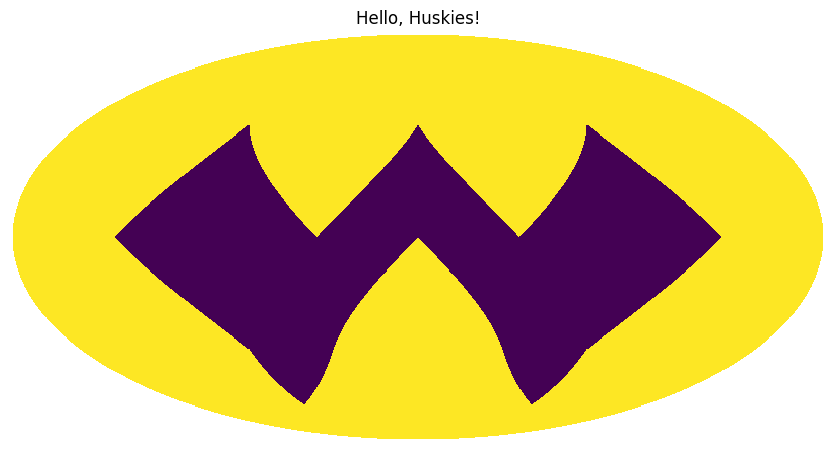

In [41]:
# hipscat_dir="/data3/epyc/data3/hipscat/catalogs/dr16q"
# cat = Catalog(hipscat_dir)
# pixels = cat.get_pixels()
# print(pixels)
pixels = pd.read_csv("/astro/users/mmd11/uw.csv")
# pixels.to_csv("/astro/users/mmd11/uw.csv", index=False)

plot_pixels(pixels, "")